In [1]:
from scipy.io import loadmat

src_path = "Matlab_output/"
src_name_list = ["EI_Response-w_ES--0.5-theta_S-0.8.mat",]

src_mat_all = []
for elm in src_name_list:
    src_mat_all.append(loadmat(src_path+elm))

print("len(src_mat_all)", len(src_mat_all))
print("src_mat_all[0].keys()", src_mat_all[0].keys())

len(src_mat_all) 1
src_mat_all[0].keys() dict_keys(['__header__', '__version__', '__globals__', 'params', 'v'])


In [2]:
# Check data

# From Matlab code 201210

# % Pehlevan model + SLS
# %params = [m L k1 k2 c mu_bf Ff t_max w_NE w_EN w_EE w_tE w_ES w_En theta_E tauE theta_N tauN theta_t taut theta_S];
# %save(['EE_Response-w_ES-' num2str(w_ES) '-theta_S-' num2str(theta_S) '.mat'], 'v', 'params');

# % GDL model + SLS
# params = [m L k1 k2 c mu_bf Ff t_max w_ENd w_NE w_EN w_tE w_ES theta_E tauE theta_N tauN theta_t taut theta_S];
# save(['EI_Response-w_ES-' num2str(w_ES) '-theta_S-' num2str(theta_S) '.mat'], 'v', 'params');

param_id_EE = ["m", "L", "k1", "k2", "c", "mu_bf", "Ff", "t_max", "w_NE", "w_EN", "w_EE", "w_tE", "w_ES", "w_En",
               "theta_E", "tauE", "theta_N", "tauN", "theta_t", "taut", "theta_S"]
param_id_EI = ["m", "L", "k1", "k2", "c", "mu_bf", "Ff", "t_max", "w_ENd", "w_NE", "w_EN", "w_tE", "w_ES",
               "theta_E", "tauE", "theta_N", "tauN", "theta_t", "taut", "theta_S"]

file_id = 0
src_mat = src_mat_all[file_id]

for i in range(len(param_id_EI)):
    print("{0}:{1}".format(param_id_EI[i], src_mat["params"][0][i]))
print("data shape:", src_mat["v"].shape)

m:0.1
L:0.41
k1:3.5
k2:4.6
c:190000.0
mu_bf:10.0
Ff:0.05
t_max:4.1
w_ENd:-10000.0
w_NE:1.0
w_EN:-1.0
w_tE:1.0
w_ES:-0.5
theta_E:0.5
tauE:15.0
theta_N:0.5
tauN:15.0
theta_t:0.2
taut:150.0
theta_S:0.8
data shape: (500, 68)


In [3]:
# Create data of boundary position

# boundary numbering
# bd=0: A9, bd=1: A8, ..., bd=10: T2, bd=11: T1(A9)
#
# matlab results: index=1: T1, index=2 : T2, ..., index=12 : A9
#
# adjust indexing in this cell

import numpy as np

# Constants
L_init = 0.4
index_position = [22 - i*2 for i in range(12)] # adjust indexing

y_all = []

for file_id in range(len(src_mat_all)):
    y = []
    for i in range(len(index_position)):
        y.append(src_mat_all[file_id]["v"][:,index_position[i]] + L_init*i)
    y = np.array(y).T
    y_all.append(y)
y_all = np.array(y_all)

print("position at t=0:{}".format(y_all[0][0]))
print("y_all.shape:", y_all.shape)

position at t=0:[0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4.  4.4]
y_all.shape: (1, 500, 12)


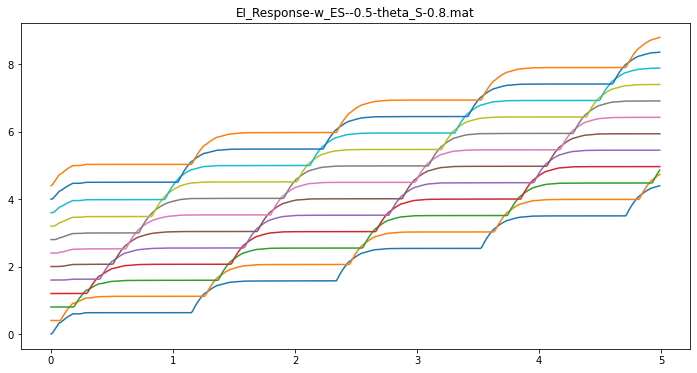

In [4]:
# Plot y_all[file_id]

import matplotlib.pyplot as plt
import numpy as np

sec_per_frame = 0.01
total_frame = 500
t = np.arange(0,total_frame)*sec_per_frame

file_id = 0

boundary_num = len(y_all[file_id][0])

plt.figure(figsize=(12,6))
for i in range(boundary_num):
    plt.plot(t, y_all[file_id][:,i])
plt.title(src_name_list[file_id])
plt.show()

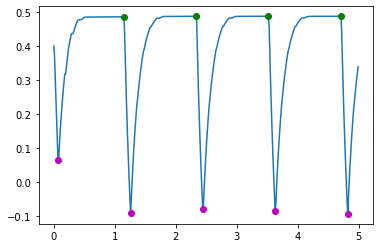

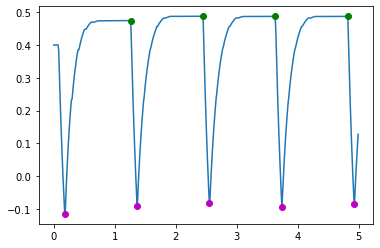

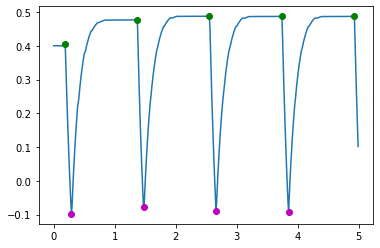

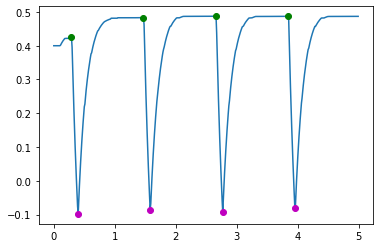

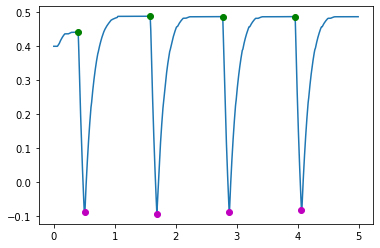

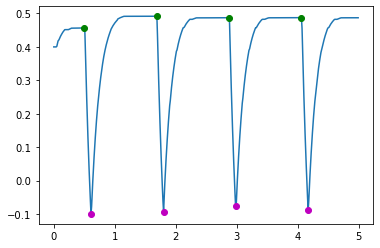

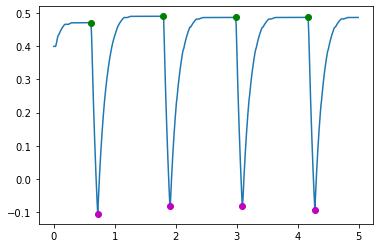

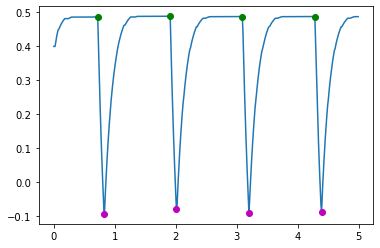

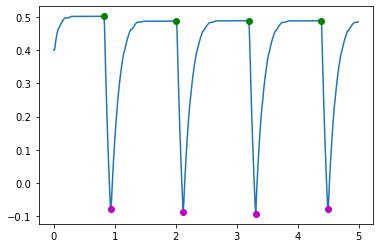

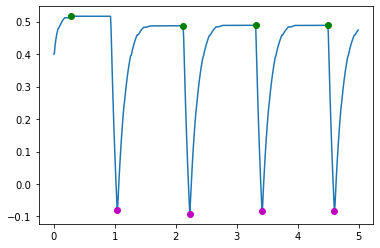

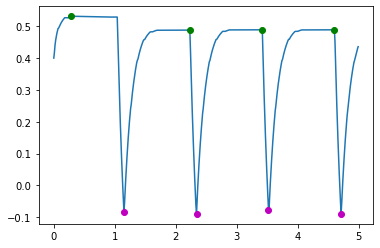

len(initial_disp_all)(file_number): 1
len(initial_disp_all[0]) (seg number): 12
len(disp_rel_all): 1
disp_rel_all[0].shape: (12, 500, 2)
len(disp_abs_all): 1
disp_abs_all[0].shape: (12, 500, 2)
len(seg_len_all): 1
seg_len_all[0].shape: (11, 500, 2)
len(body_len_all): 1
body_len_all[0].shape: (500, 2)
len(seg_len_range_all): 1
len(seg_len_range_all[0]): 11
len(seg_len_peaks_all): 1
len(seg_len_peaks_all[0]): 11


In [5]:
# Calculate kinematics from boundary position data

import peakutils

# constants
sec_per_frame = 0.01  # 0.03333 for larva measurement

initial_disp_all = []
disp_rel_all = []
disp_abs_all = []
seg_len_all = []
body_len_all = []

for file_id in range(len(y_all)):

    dat = y_all[file_id]   # frame, boundary
    boundary_num = len(dat[0])
    
    # initial position
    initial_disp = []
    for bd in range(boundary_num):
        v0 = dat[0,0]   # dat[0,0,:] for vector
        v1 = dat[0,bd]  # dat[0,bd,:] for vector
        initial_disp.append(v1-v0)  # use np.linalg.norm for vector
    initial_disp_all.append(initial_disp)

    # displacement_rel
    disp_rel = []
    for bd in range(boundary_num):
        disp_seg = []
        for frame in range(len(dat)):
            t = frame * sec_per_frame
            v0 = dat[0,bd]   # dat[0,bd,:] for vector
            v1 = dat[frame,bd]   # dat[frame,bd,:] for vector
            disp_seg.append([t, v1-v0])  # use np.linalg.norm for vector
        disp_rel.append(disp_seg)
    disp_rel = np.array(disp_rel)
    disp_rel_all.append(disp_rel)

    # displacement_abs
    disp_abs = []
    for bd in range(boundary_num):
        disp_abs0 = []
        for frame in range(len(disp_rel[0])):
            t = disp_rel[bd,frame,0]
            disp_abs00 = disp_rel[bd,frame,1] + initial_disp[bd]
            disp_abs0.append([t, disp_abs00])
        disp_abs.append(disp_abs0)
    disp_abs = np.array(disp_abs)
    disp_abs_all.append(disp_abs)

    # segment length
    seg_len = []
    for seg in range(boundary_num-1):
        seg_len0 = []
        for frame in range(len(dat)):
            t = frame * sec_per_frame
            v0 = dat[frame,seg]   # dat[frame,seg,:] for vector
            v1 = dat[frame,seg+1]   # dat[frame,seg+1,:] for vector
            seg_len0.append([t, v1-v0])  # use np.linalg.norm for vector
        seg_len.append(seg_len0)
    seg_len = np.array(seg_len)
    seg_len_all.append(seg_len)

    # body length
    body_len = []
    for frame in range(len(dat)):
        t = frame * sec_per_frame
        v0 = dat[frame,0] # posterior end, dat[frame,0,:] for vector
        v1 = dat[frame,boundary_num-1] # anterior end, dat[frame,boundary_num-1,:] for vector
        body_len.append([t, v1-v0])  # use np.linalg.norm for vector
    body_len_all.append(np.array(body_len))

    # segment length
    seg_len_range_all = []
    seg_len_peaks_all = []
    for file_id in range(len(seg_len_all)):
        
        # find peaks
        seg_len_peaks0 = []
        for seg in range(len(seg_len_all[file_id])):
            dat = seg_len_all[file_id][seg]
            peaks_id_p = peakutils.indexes(dat[:,1], thres=0.2, min_dist=100)
            peaks_id_n = peakutils.indexes(-dat[:,1], thres=0.2, min_dist=100)
            seg_len_peaks0.append([peaks_id_p, peaks_id_n])
        #seg_len_peaks0 = np.array(seg_len_peaks0)
        seg_len_peaks_all.append(seg_len_peaks0)
        
        # measure length
        seg_len_range0 = []
        for seg in range(len(seg_len_all[file_id])):
            dat_src = seg_len_all[file_id][seg]
            dat_peaks = seg_len_peaks0[seg]

            dst_p = [dat_src[dat_peaks[0],0], dat_src[dat_peaks[0],1]]
            dst_n = [dat_src[dat_peaks[1],0], dat_src[dat_peaks[1],1]]
            seg_len_range0.append([dst_p, dst_n])

            plt.plot(dat_src[:,0], dat_src[:,1])
            plt.plot(dat_src[dat_peaks[0],0], dat_src[dat_peaks[0],1], 'go')
            plt.plot(dat_src[dat_peaks[1],0], dat_src[dat_peaks[1],1], 'mo')
            plt.show()
            #plt.savefig(src_path + "img/201126_11_points_segment_length_{0}_seg{1}.png".format(src_name[file_id], seg))
            #plt.close()
        #seg_len_range0 = np.array(seg_len_range0)
        seg_len_range_all.append(seg_len_range0)

    
print("len(initial_disp_all)(file_number):", len(initial_disp_all))
print("len(initial_disp_all[0]) (seg number):", len(initial_disp_all[0]))
print("len(disp_rel_all):", len(disp_rel_all))
print("disp_rel_all[0].shape:", disp_rel_all[0].shape)
print("len(disp_abs_all):", len(disp_abs_all))
print("disp_abs_all[0].shape:", disp_abs_all[0].shape)
print("len(seg_len_all):", len(seg_len_all))
print("seg_len_all[0].shape:", seg_len_all[0].shape)
print("len(body_len_all):", len(body_len_all))
print("body_len_all[0].shape:", body_len_all[0].shape)
print("len(seg_len_range_all):", len(seg_len_range_all))
print("len(seg_len_range_all[0]):", len(seg_len_range_all[0]))
print("len(seg_len_peaks_all):", len(seg_len_peaks_all))
print("len(seg_len_peaks_all[0]):", len(seg_len_peaks_all[0]))

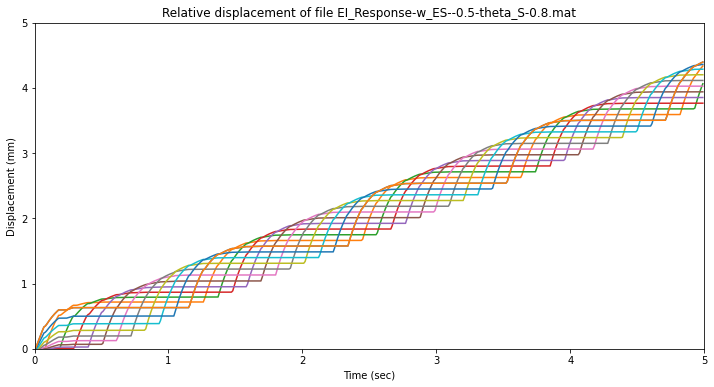

In [6]:
import matplotlib.pyplot as plt
import numpy as np

file_id = 0

plt.figure(figsize=(12,6))
for bd in range(boundary_num):
    plt.plot(disp_rel_all[file_id][bd,:,0], disp_rel_all[file_id][bd,:,1])
plt.title("Relative displacement of file {0}".format(src_name_list[file_id]))
plt.xlabel("Time (sec)")
plt.ylabel("Displacement (mm)")
plt.xlim([0,5])
plt.ylim([0,5])
plt.xticks([0,1,2,3,4,5])
plt.show()

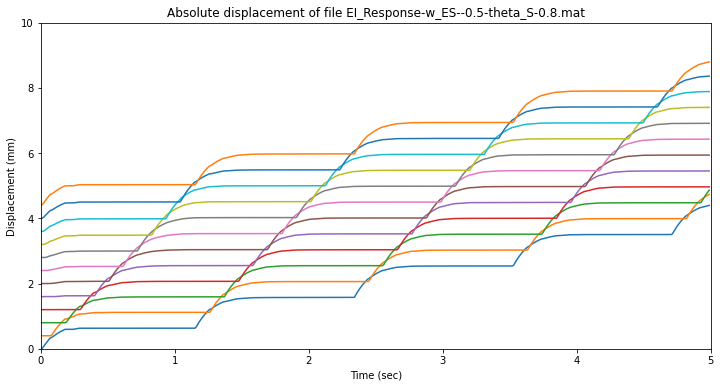

In [7]:
import matplotlib.pyplot as plt
import numpy as np

file_id = 0

plt.figure(figsize=(12,6))
for bd in range(boundary_num):
    plt.plot(disp_abs_all[file_id][bd,:,0], disp_abs_all[file_id][bd,:,1])
plt.title("Absolute displacement of file {0}".format(src_name_list[file_id]))
plt.xlabel("Time (sec)")
plt.ylabel("Displacement (mm)")
plt.xlim([0,5])
plt.ylim([0,10])
plt.xticks([0,1,2,3,4,5])
plt.show()

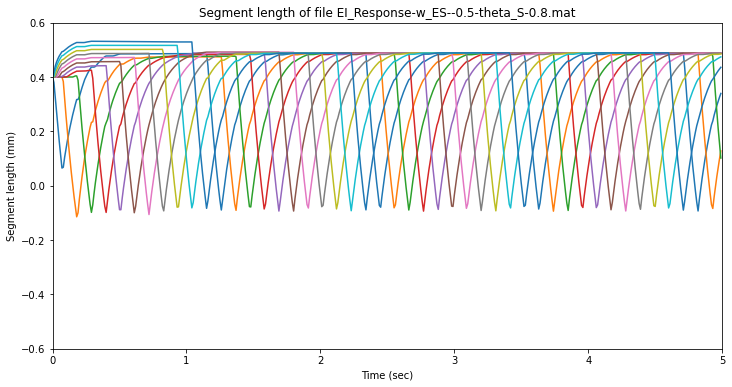

In [8]:
import matplotlib.pyplot as plt
import numpy as np

file_id = 0

plt.figure(figsize=(12,6))
for seg in range(boundary_num-1):
    plt.plot(seg_len_all[file_id][seg,:,0], seg_len_all[file_id][seg,:,1])
plt.title("Segment length of file {0}".format(src_name_list[file_id]))
plt.xlabel("Time (sec)")
plt.ylabel("Segment length (mm)")
plt.xlim([0,5])
plt.ylim([-0.6,0.6])
plt.xticks([0,1,2,3,4,5])
plt.show()

# Parameter extraction

### Stride length

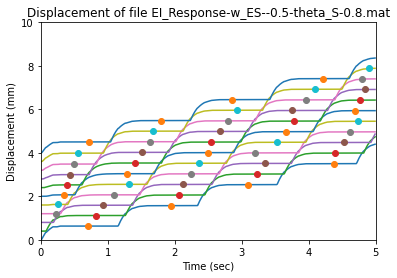

In [9]:
import peakutils
from scipy.signal import argrelmax

xmin = 0
xmax = 10
bins = 200
width = (xmax-xmin)/bins

stride_all = []

for file_id in range(len(disp_abs_all)):
    stride_seg = []
    for seg in range(len(disp_abs_all[0])):
        stride_seg0 = []
        hist_dat = np.histogram(disp_abs_all[file_id][seg,:,1], bins=bins, range=(xmin,xmax))
        #peaks = hist_dat[1][argrelmax(hist_dat[0], order=4)]
        peaks_id = peakutils.indexes(hist_dat[0], thres=0.2, min_dist=5)
        peaks_id = np.sort(peaks_id)
        peaks = hist_dat[1][peaks_id]
        for peak_id in range(len(peaks)):
            dat0 = disp_abs_all[file_id][seg]
            disp_peak = [dat0[i,1] for i in range(len(dat0)) 
                         if dat0[i,1] > peaks[peak_id] and dat0[i,1] < peaks[peak_id] + width]
            time_peak = [dat0[i,0] for i in range(len(dat0)) 
                         if dat0[i,1] > peaks[peak_id] and dat0[i,1] < peaks[peak_id] + width]
            disp_peak_med = np.median(disp_peak)
            time_peak_med = np.median(time_peak)
            stride_seg0.append([time_peak_med, disp_peak_med])
        stride_seg.append(np.array(stride_seg0))

    stride_all.append(stride_seg)

    plt.figure()
    for seg in range(11):
        plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1])
        plt.plot(stride_all[file_id][seg][:,0], stride_all[file_id][seg][:,1], 'o')

    plt.title("Displacement of file {0}".format(src_name_list[file_id]))
    plt.xlabel("Time (sec)")
    plt.ylabel("Displacement (mm)")
    plt.xlim([0,5])
    plt.ylim([0,10])
    plt.xticks([0,1,2,3,4,5])
    plt.show()

In [10]:
import numpy as np

stride_length_all = []
for file_id in range(len(stride_all)):
    dst1 = []
    for bd in range(len(stride_all[file_id])):
        dat_stride = stride_all[file_id][bd]
        dst0 = []
        for i in range(len(dat_stride)-1):
            dst0.append(dat_stride[i+1,1]-dat_stride[i,1])
        dst1.append(np.median(dst0))
    stride_length_all.append(dst1)

stride_length_all_median = []
for file_id in range(len(stride_length_all)):
    stride_length_all_median.append(np.median(stride_length_all[file_id]))

print("Stride length:")
for file_id in range(len(stride_length_all)):
    print("{0}:  {1:.3f} mm".format(src_name_list[file_id], stride_length_all_median[file_id]))

Stride length:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  0.964 mm


### Stride duration (and intersegmental delay)

In [11]:
import numpy as np
import peakutils

sec_per_frame = 0.01

# boundary stride duration
boundary_stride_duration_all = []

for file_id in range(len(disp_abs_all)):
    dst0 = []
    for bd in range(len(disp_abs_all[file_id])):

        sig0 = np.diff(disp_abs_all[file_id][bd][:,1])
        sig1 = np.diff(disp_abs_all[file_id][bd][:,1])

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0):], thres=0.2, min_dist=20)
        estimated_delay = peaks_id[0] * sec_per_frame
        dst0.append(estimated_delay)
        
        #fig, ax = plt.subplots(2,1, figsize = (10,8))
        #ax[0].plot(sig0, label="sig0")
        #ax[0].plot(sig1, label="sig1")
        #ax[0].legend()
        #ax[1].set_ylabel("corr")
        #ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        #ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        #ax[1].set_xlim([0, len(sig1)])
        #plt.show()
        #plt.savefig(fig_path + "201126_boundary_auto_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        #plt.close()
    boundary_stride_duration_all.append(dst0)

# intersegmental delay
boundary_motion_delay_all = []

for file_id in range(len(disp_abs_all)):
    dst0 = []
    for seg in range(len(disp_abs_all[file_id])-1):

        sig0 = np.diff(disp_abs_all[file_id][seg][:,1])
        sig1 = np.diff(disp_abs_all[file_id][seg+1][:,1])

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        t_margin = 2
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0)-t_margin:], thres=0.2, min_dist=20)
        peaks_id = peaks_id - t_margin
        estimated_delay = peaks_id[0] * sec_per_frame
        dst0.append(estimated_delay)
        
        #fig, ax = plt.subplots(2,1, figsize = (10,8))
        #ax[0].plot(sig0, label="sig0")
        #ax[0].plot(sig1, label="sig1")
        #ax[0].legend()
        #ax[1].set_ylabel("corr")
        #ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        #ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        #ax[1].set_xlim([0, len(sig1)])
        #plt.show()
        #plt.savefig(fig_path + "201126_boundary_motion_interseg_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        #plt.close()
    boundary_motion_delay_all.append(dst0)

In [12]:
print("Stride duration:")
for file_id in range(len(boundary_stride_duration_all)):
    print("{0}:  {1:.3f} sec".format(src_name_list[file_id], np.median(boundary_stride_duration_all[file_id]))) 
print("Intersegmental delay:")
for file_id in range(len(boundary_motion_delay_all)):
    print("{0}:  {1:.3f} sec".format(src_name_list[file_id], np.median(boundary_motion_delay_all[file_id])))

Stride duration:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  1.190 sec
Intersegmental delay:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  0.110 sec


### Speed

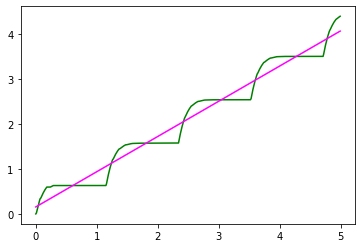

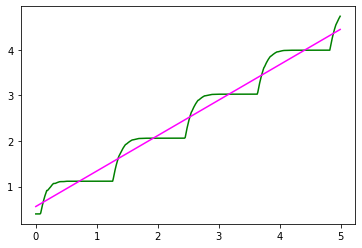

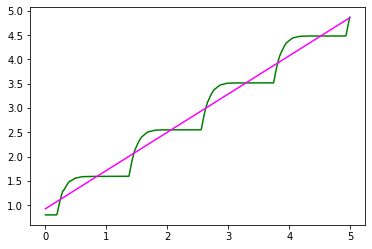

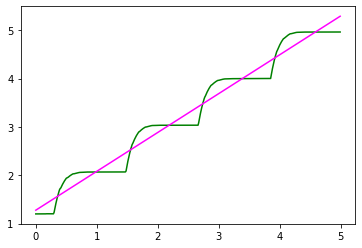

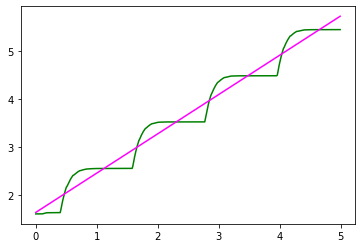

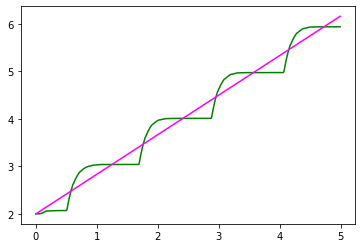

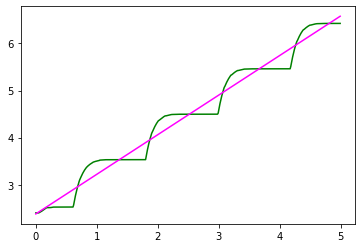

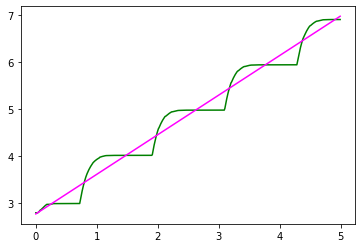

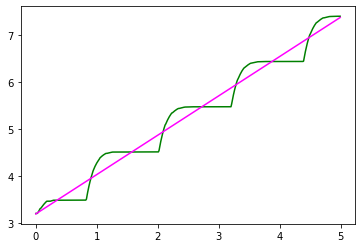

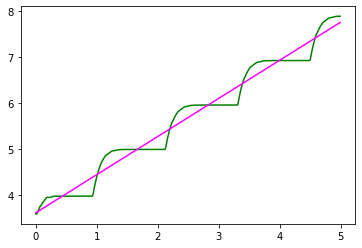

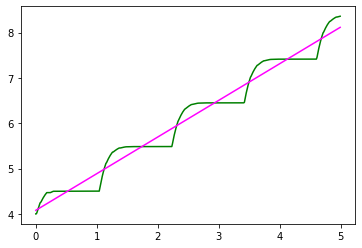

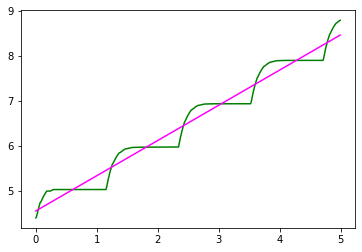

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

speed_all = []

for file_id in range(len(disp_abs_all)):
    dst = []
    for bd in range(len(disp_abs_all[file_id])):
        lr = LinearRegression()
        X = disp_abs_all[file_id][bd,:,0].reshape(-1,1)
        Y = disp_abs_all[file_id][bd,:,1].reshape(-1,1)
        lr.fit(X, Y)

        plt.plot(X, Y, color='green')
        plt.plot(X, lr.predict(X), color='magenta')
        plt.show()
        #plt.savefig(fig_path + "201126_11_points_speed_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        #plt.close()
        dst.append(lr.coef_[0][0])
    speed_all.append(dst)
speed_all = np.array(speed_all)

In [14]:
print("Speed:")
for file_id in range(len(speed_all)):
    print("{0}:  {1:.3f} mm/sec".format(src_name_list[file_id], np.median(speed_all[file_id])))

Speed:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  0.815 mm/sec


### Max and min segment length

In [15]:
import numpy as np

max_len_all = []
min_len_all = []

for file_id in range(len(seg_len_range_all)):
    dst_max = []
    dst_min = []
    for seg in range(len(seg_len_range_all[file_id])):
        dat = seg_len_range_all[file_id][seg]
        dst_max.append(dat[0][1].max())
        dst_min.append(dat[1][1].min())
    max_len_all.append(dst_max)
    min_len_all.append(dst_min)
max_len_all = np.array(max_len_all)
min_len_all = np.array(min_len_all)

print("Max length:")
for file_id in range(len(max_len_all)):
    print("{0}:  {1:.3f} mm".format(src_name_list[file_id], np.median(max_len_all[file_id])))

print("Min length:")
for file_id in range(len(min_len_all)):
    print("{0}:  {1:.3f} mm".format(src_name_list[file_id], np.median(min_len_all[file_id]))) 

Max length:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  0.489 mm
Min length:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  -0.093 mm


### Contraction duration

In [16]:
from scipy import signal

FWHM_segment_length_all = []
valley_id = 2   # measure the duration at the valley_id'th valley 

for file_id in range(len(seg_len_all)):
    dst = []
    for seg in range(len(seg_len_all[file_id])):
        dat_time = seg_len_all[file_id][seg][:,0]
        dat_length = seg_len_all[file_id][seg][:,1]
        valley_point = seg_len_range_all[file_id][seg][1][0][valley_id]
        idx = np.where(dat_time == valley_point)[0]
        thrd = (max_len_all[file_id][seg] - min_len_all[file_id][seg])*0.5 + min_len_all[file_id][seg]

        # search for left idx
        left_ = 0
        while(dat_length[idx-left_]<thrd):
            left_ += 1
        idx_left = idx - left_

        # search for right idx
        right_ = 0
        while(dat_length[idx+right_]<thrd):
            right_ += 1
        idx_right = idx + right_

        time_left = dat_time[idx_left]
        time_right = dat_time[idx_right]

        dst0 = [[time_left[0], time_right[0]], [int(idx_left[0]), int(idx_right[0])]]

        dst.append(dst0)
    FWHM_segment_length_all.append(dst)
FWHM_segment_length_all = np.array(FWHM_segment_length_all)

contraction_duration_all = []
for file_id in range(len(FWHM_segment_length_all)):
    dst = []
    for seg in range(len(FWHM_segment_length_all[0])):
        dat = FWHM_segment_length_all[file_id][seg]
        dst.append(dat[0,1] - dat[0,0])
    contraction_duration_all.append(dst)
contraction_duration_all = np.array(contraction_duration_all)

print("Contraction duration:")
for file_id in range(len(contraction_duration_all)):
    print("{0}:  {1:.3f} sec".format(src_name_list[file_id], np.median(contraction_duration_all[file_id]))) 

Contraction duration:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  0.160 sec


# Summary

In [17]:
print("Stride length:")
for file_id in range(len(stride_length_all)):
    print("{0}:  {1:.3f} mm".format(src_name_list[file_id], stride_length_all_median[file_id]))
print("\n")

print("Stride duration:")
for file_id in range(len(boundary_stride_duration_all)):
    print("{0}:  {1:.3f} sec".format(src_name_list[file_id], np.median(boundary_stride_duration_all[file_id])))
print("\n")

print("Intersegmental delay:")
for file_id in range(len(boundary_motion_delay_all)):
    print("{0}:  {1:.3f} sec".format(src_name_list[file_id], np.median(boundary_motion_delay_all[file_id])))
print("\n")
    
print("Speed:")
for file_id in range(len(speed_all)):
    print("{0}:  {1:.3f} mm/sec".format(src_name_list[file_id], np.median(speed_all[file_id])))
print("\n")

print("Max length:")
for file_id in range(len(max_len_all)):
    print("{0}:  {1:.3f} mm".format(src_name_list[file_id], np.median(max_len_all[file_id])))
print("\n")

print("Min length:")
for file_id in range(len(min_len_all)):
    print("{0}:  {1:.3f} mm".format(src_name_list[file_id], np.median(min_len_all[file_id]))) 
print("\n")
    
print("Contraction duration:")
for file_id in range(len(contraction_duration_all)):
    print("{0}:  {1:.3f} sec".format(src_name_list[file_id], np.median(contraction_duration_all[file_id]))) 

Stride length:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  0.964 mm


Stride duration:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  1.190 sec


Intersegmental delay:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  0.110 sec


Speed:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  0.815 mm/sec


Max length:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  0.489 mm


Min length:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  -0.093 mm


Contraction duration:
EI_Response-w_ES--0.5-theta_S-0.8.mat:  0.160 sec
